In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)

In [3]:
# 학습셋과 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

17465344/17464789 [==============================] - 5s 0us/step


In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000, 100), (25000, 100), (25000,), (25000,))

In [4]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5)) 
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

W0821 15:19:00.385809  2624 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 15:19:00.405811  2624 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 15:19:00.408811  2624 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 15:19:00.420811  2624 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0821 15:19:00.427812  2624 deprecation.py:506

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total para

In [13]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=50, epochs=5, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 24s 960us/step - loss: 0.4262 - acc: 0.7858 - val_loss: 0.3381 - val_acc: 0.8514
Epoch 2/5
25000/25000 [==============================] - 23s 936us/step - loss: 0.2853 - acc: 0.8815 - val_loss: 0.3260 - val_acc: 0.8560
Epoch 3/5
25000/25000 [==============================] - 23s 916us/step - loss: 0.2373 - acc: 0.9043 - val_loss: 0.3483 - val_acc: 0.8492
Epoch 4/5
25000/25000 [==============================] - 23s 916us/step - loss: 0.1986 - acc: 0.9209 - val_loss: 0.3394 - val_acc: 0.8556
Epoch 5/5
25000/25000 [==============================] - 23s 913us/step - loss: 0.1638 - acc: 0.9387 - val_loss: 0.3721 - val_acc: 0.8518


In [15]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 4s 148us/step

 Test Accuracy: 0.8518


In [16]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_acc']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['acc']

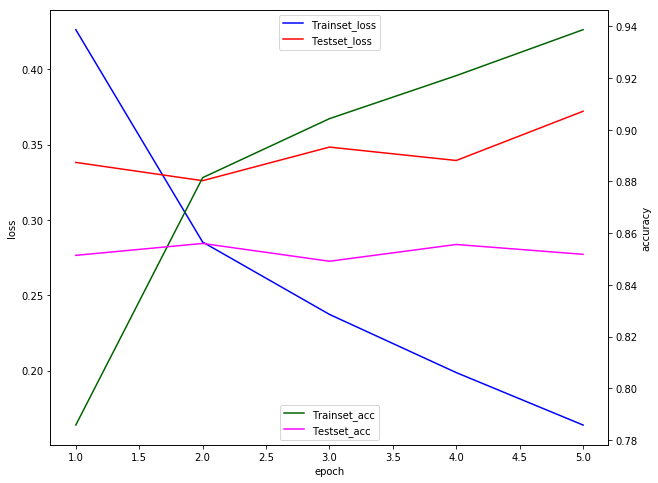

In [17]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()